<a href="https://colab.research.google.com/github/sofisuares/Machine-learning/blob/main/datos_desbalanceados_y_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos desbalanceados y métricas de evaluación modelo de clasificación


In [1]:
from imblearn.over_sampling import SMOTE   # Para clases desbalanceadas
from sklearn.datasets import make_classification    # Sirve para generar un data set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
# se recomienda leer el siguiente material antes de continuar:

# https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data#1.2-Undersampling-using-Tomek-Links

# https://imbalanced-learn.org/stable/references/index.html

In [ ]:
# Datos sintéticos desbalanceados
# 6 variables ; 2 clases ; 90% clase mayoritaria 10% minoritaria ; semilla: 42
# Generar un conjunto de datos de ejemplo con clases desbalanceadas
X, y = make_classification(n_samples=2000, n_features=6,
                            n_classes=2, weights=[0.9, 0.1], random_state=42)

In [ ]:
values_counts_originales = np.asarray(np.unique(y, return_counts=True))
values_counts_originales

# 1788 datos de clase 0 y 212 de clase 1

array([[   0,    1],
       [1788,  212]], dtype=int64)

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
# Reservo 10% información para testeo -> con stratify = y garantiza que en cada conjunto de datos se tenga la misma proporción de cada clase
# en testeo tendré el 90% de una clase y el 10% de la minoritaria, e igual para entrenamiento


In [ ]:
values_counts_y_train = np.asarray(np.unique(y_train, return_counts=True))
values_counts_y_train

# 1609 datos de clase 0 , 191 de clase 1 -> se mantienen las proporciones gracias a stratify=y

array([[   0,    1],
       [1609,  191]], dtype=int64)

In [ ]:
# probemos con el modelo Logistic Regression
classifier = LogisticRegression()

In [ ]:
# usemos el fit en los datos originales con un fuerte desbalanceo de clases
modelo_datos_originales= classifier.fit(X_train, y_train)

y_pred_train_original = modelo_datos_originales.predict(X_train)

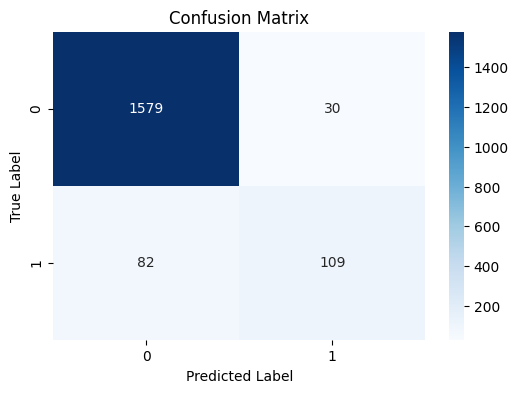

In [ ]:

# Creando la matriz de confusión
cm = confusion_matrix(y_train, y_pred_train_original)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:

# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_train, y_pred_train_original, pos_label=1)
precision_negativa = metrics.precision_score(y_train, y_pred_train_original, pos_label=0)
precision_positiva, precision_negativa

(0.7841726618705036, 0.950632149307646)

In [ ]:

metrics.recall_score(y_train, y_pred_train_original, pos_label=1), metrics.recall_score(y_train, y_pred_train_original, pos_label=0)


#El recall proporciona información sobre la capacidad del modelo para detectar correctamente los casos positivos en una clase específica

(0.5706806282722513, 0.9813548788067122)

In [ ]:

# Todas las metricas en un solo resumen
print(metrics.classification_report(y_train, y_pred_train_original))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1609
           1       0.78      0.57      0.66       191

    accuracy                           0.94      1800
   macro avg       0.87      0.78      0.81      1800
weighted avg       0.93      0.94      0.93      1800



In [ ]:
# Veamos que pasa en test
y_pred_test_original = modelo_datos_originales.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test_original))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       179
           1       0.70      0.67      0.68        21

    accuracy                           0.94       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.93      0.94      0.93       200



## SMOTE para balancear las clases

In [ ]:
# Aplicar SMOTE en el conjunto de entrenamiento
smote = SMOTE(k_neighbors=5,random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
#Comprobemos que las clases estan balabceadas
values_counts_SMOTE = np.asarray(np.unique(y_train_smote, return_counts=True))
values_counts_SMOTE

array([[   0,    1],
       [1609, 1609]], dtype=int64)

In [ ]:
# Si no quiero generar clases sintéticas, puedo especificar dentro del modelo de regresión logística que las clases son desbalanceadas para
# que le ajuste pesos

# Entrenar un clasificador en los datos con SMOTE
classifier = LogisticRegression(class_weight="balanced")  # Esto se hace sin hacer smote. Así como está no tiene sentido porque con SMOTE se balancearon
modelo_datos_SMOTE = classifier.fit(X_train_smote, y_train_smote)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTE = modelo_datos_SMOTE.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred_SMOTE))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       179
           1       0.49      0.95      0.65        21

    accuracy                           0.89       200
   macro avg       0.74      0.92      0.79       200
weighted avg       0.94      0.89      0.90       200



El modelo aprende con datos sintéticos pero después hay que validarlo o ver su rendimiento con datos reales o de testeo

## RandomOverSampler

Replica datos que ya tenemos

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Aplicar Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
#Comprobemos que las clases estan balabceadas
values_counts_SMOTE = np.asarray(np.unique(y_train_resampled, return_counts=True))
values_counts_SMOTE

array([[   0,    1],
       [1609, 1609]], dtype=int64)

In [ ]:

# Entrenar un clasificador en los datos con R.Oversampling
classifier = LogisticRegression()
modelo_datos_R_Oversampling= classifier.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred_R_Oversampling = modelo_datos_R_Oversampling.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred_R_Oversampling))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       179
           1       0.45      1.00      0.62        21

    accuracy                           0.87       200
   macro avg       0.72      0.93      0.77       200
weighted avg       0.94      0.87      0.89       200



## SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek
#Over-sampling using SMOTE and cleaning using Tomek links
#https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html


In [ ]:
# Aplicar SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)

In [ ]:
# Entrenar un clasificador en los datos con R.Oversampling
classifier = LogisticRegression()
modelo_datos_SMOTETomek= classifier.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTETomek = modelo_datos_SMOTETomek.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred_SMOTETomek))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       179
           1       0.49      0.95      0.65        21

    accuracy                           0.89       200
   macro avg       0.74      0.92      0.79       200
weighted avg       0.94      0.89      0.90       200



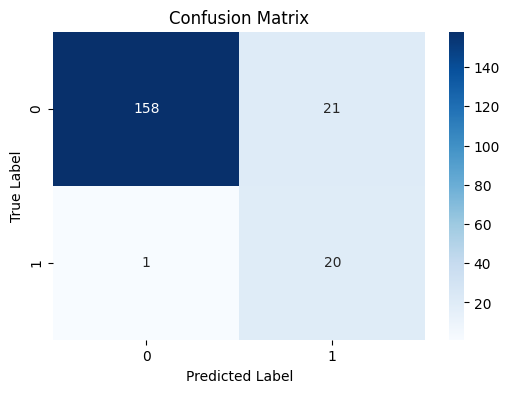

In [ ]:
# Creando la matriz de confusión
cm = confusion_matrix(y_test, y_pred_SMOTETomek)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Curva ROC y AUC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot

lr_probs = modelo_datos_SMOTETomek.predict_proba(X_train)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]



Para pintar la curva ROC de un modelo en python podemos utilizar directamente la función roc_curve() de scikit-learn.

La función necesita dos argumentos. Por un lado las salidas reales (0,1)  del conjunto de test y por otro las predicciones de probabilidades obtenidas del modelo para la clase 1 en test.


Para obtener el valor de AUC, tenemos la función roc_auc_score() (mismo parámetros de entrada). En este caso devuelve el valor de AUC ,comprendido entre 0.5 (clasificador aleatorio) y 1.0 (clasificador perfecto).

In [ ]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_train))]

In [ ]:

# Calculamos el AUC
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)

In [ ]:
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.935


In [ ]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)


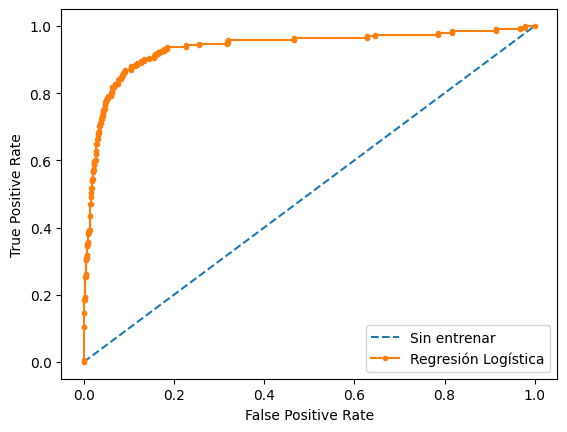

In [ ]:
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
pyplot.legend()
pyplot.show()

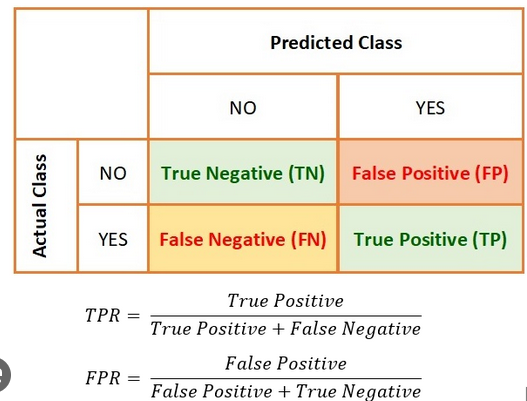

In [ ]:
# Calcular la curva ROC
fpr, tpr, umbrales = roc_curve(y_train, lr_probs)

# Calcular la distancia al punto (0, 1) para encontrar el punto de corte óptimo
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
indice_optimo = np.argmin(distancias)
umbral_optimo = umbrales[indice_optimo]

print("Punto de corte óptimo:", umbral_optimo)

Punto de corte óptimo: 0.5801612142121408


In [ ]:
# Crear un DataFrame con los valores de fpr, tpr y umbrales
import pandas as pd
data = pd.DataFrame(zip(fpr, tpr, umbrales), columns=["FPR", "TPR", "Umbrales"])
data

,FPR,TPR,Umbrales
0,0.000000,0.000000,1.999254
1,0.000000,0.005236,0.999254
2,0.000000,0.104712,0.993643
3,0.000622,0.104712,0.993469
4,0.000622,0.146597,0.988237
...,...,...,...
169,0.968303,0.989529,0.000829
170,0.968303,0.994764,0.000818
171,0.979490,0.994764,0.000436
172,0.979490,1.000000,0.000435


In [ ]:
# Establecer un umbral para convertir las probabilidades en etiquetas binarias
umbral = 0.5801612142121406
etiquetas_predichas = (lr_probs >= umbral).astype(int)

etiquetas_predichas

array([1, 0, 0, ..., 0, 1, 0])

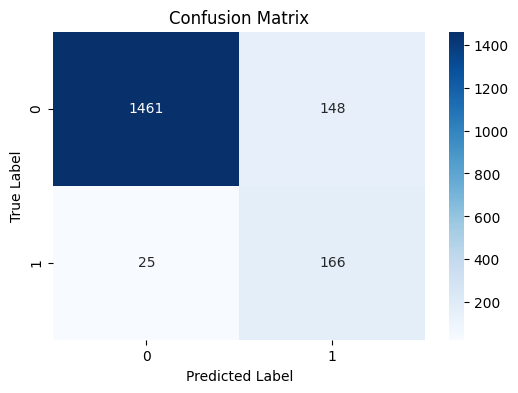

In [ ]:
# Creando la matriz de confusión
cm = confusion_matrix(y_train, etiquetas_predichas)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Evaluar el rendimiento del modelo
print(classification_report(y_train, etiquetas_predichas))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1609
           1       0.53      0.87      0.66       191

    accuracy                           0.90      1800
   macro avg       0.76      0.89      0.80      1800
weighted avg       0.93      0.90      0.91      1800



Sensibilidad (Recall): Al disminuir el umbral de corte, es probable que se clasifiquen más instancias como positivas. Esto puede aumentar la sensibilidad (recall), ya que el modelo capturará más casos positivos. Sin embargo, al hacerlo, también es probable que aumente la tasa de falsos positivos.

Especificidad: Al aumentar el umbral de corte, se clasificarán menos instancias como positivas, lo que puede aumentar la especificidad (1 - FPR) del modelo. Esto significa que el modelo será más preciso en la clasificación de instancias negativas. Sin embargo, es posible que esto también disminuya la sensibilidad.

Equilibrio entre sensibilidad y especificidad: Al ajustar el umbral de corte, se busca encontrar un equilibrio entre la sensibilidad y la especificidad según los requisitos del problema. Si el objetivo es maximizar la sensibilidad, se puede disminuir el umbral de corte, aunque esto puede aumentar los falsos positivos. Si se busca maximizar la especificidad, se puede aumentar el umbral de corte, pero esto puede disminuir la sensibilidad.

Resumen: buscamos tener TPR alto (verdaderos positivos) y minimizar FPR (falsos positivos)